# Obligatorisk innlevering 2 - oppgave 1

Denne oppgaven tar for seg et datasett fra Food Mart, som er ennærbutikkjede i USA. Food Mart har i dette datasettet samlet endel data i forbindelse med mediekampanjer. Din oppgave er å forutsi kostnadene for mediekampanjer i matvaremarkedet på grunnlag av funksjonene som tilbys.

In [13]:
# Importer resten av pakkene du trenger her:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [14]:
# I denne oppgaven skal dere bruke følgende datasett:
df = pd.read_csv("./datasett1.csv")
# Her deler jeg datasettet inn i egenskaper (X) og target (y)
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
# Tilslutt deler jeg inn i et trening- og et testsett (75%/25%)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=0)
# PS: Ikke endre denne kodecellen!

#### Oppgave 1.1) 
Visualiser $y\_train$ og $y\_val$ i et histogram. Kan du, basert på figuren, se hva slags problem vi skal løse (regresjon/klassifisering)? 

Begrunn svaret

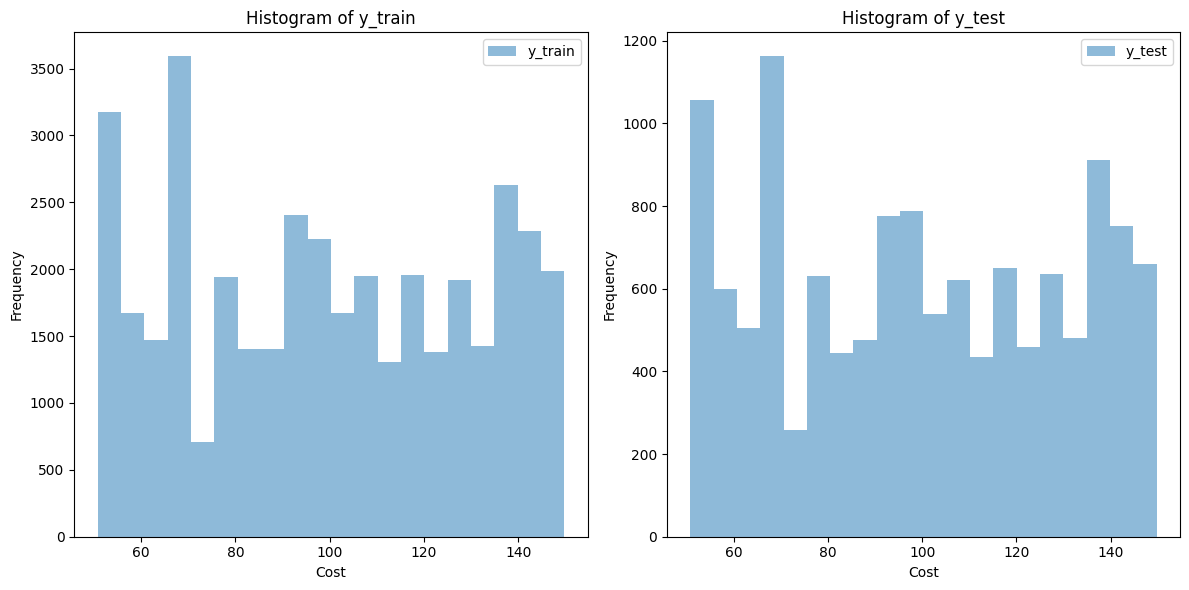

In [15]:
#TODO: visualiser y_train og y_test i et histogram
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(y_train, bins=20, alpha=0.5, label='y_train')
plt.legend(loc='upper right')
plt.xlabel('Cost')
plt.ylabel('Frequency')
plt.title('Histogram of y_train')

plt.subplot(1, 2, 2)
plt.hist(y_test, bins=20, alpha=0.5, label='y_test')
plt.legend(loc='upper right')
plt.xlabel('Cost')
plt.ylabel('Frequency')
plt.title('Histogram of y_test')

plt.tight_layout()
plt.show()

**Svar:**

*< Ut ifra grafen kan vi si at vi skal løse en regresjons problem. Dette er fordi kostnadene ikke skal klasifiseres i dyrt eller billig, men i en kostnad i kroner/dollar. Verdiene er også kontinuerlige>*

#### Oppgave 1.2) 

fullfør funksjonen under slik at den tar inn både egenskapene og target, legger disse sammen i samme matrise igjen og visualiser dataene som en korrelasjonsmatrise (poenget er at du skal kunne se hvordan egenskapene korrelerer med target).

* Beskriv hvilke egenskaper du ser korrelerer mest med target

In [ ]:
def korrelasjonsmatrise(X,y):
    X_temp = X.copy()
    y_temp = y.copy()
    X_temp["Target"] = y_temp
    #TODO: Fullfør koden
    corr = X_temp.corr()
    mask = np.triu(np.ones_like(corr, dtype=bool))
    plt.figure(figsize=(12, 8))
    # Lag en heatmap av korrelasjonsmatrisen under diagnonalen
    sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={"shrink": .8})
    plt.title('Correlation Matrix')
    plt.show()

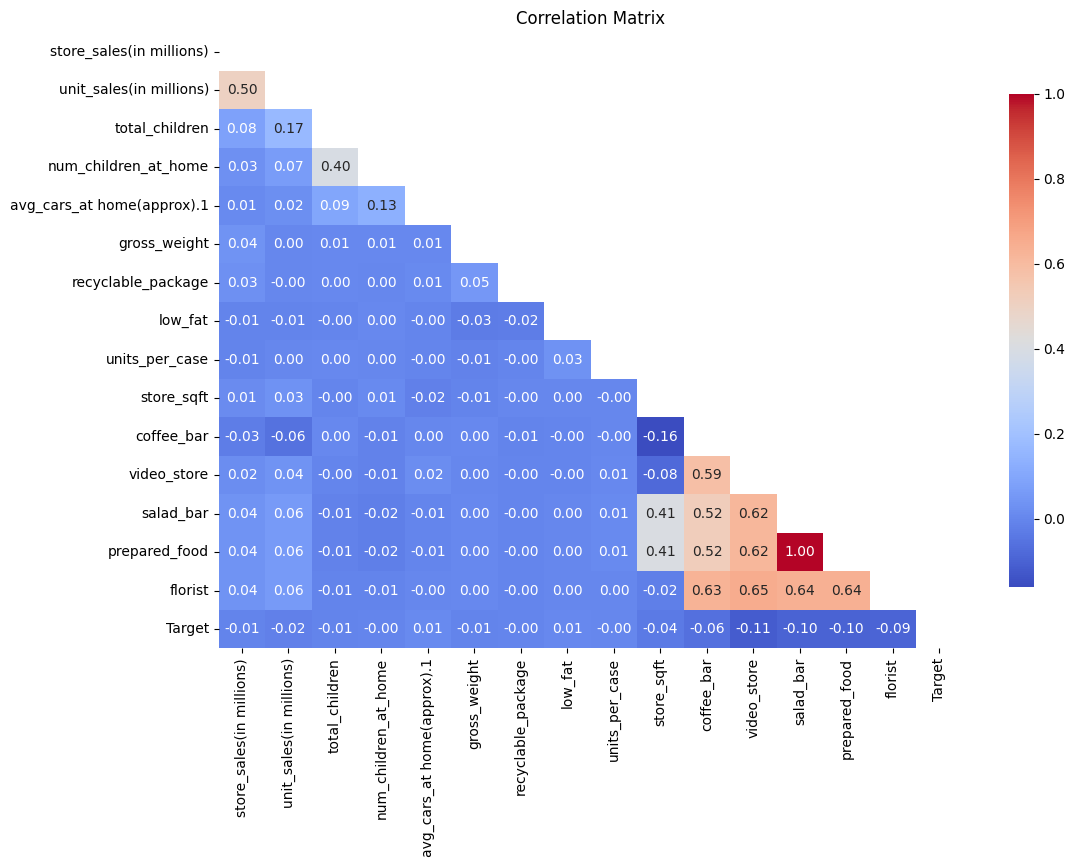

In [17]:
korrelasjonsmatrise(X_train,y_train)

**Svar:**

*< Når man ser korrelasjons matrise kan vi indentifisere høy korrelasjon med target. Verdier nærme 1 og -1 vil sammenhenge med target. Slike verdier kan være nyttig å ta med seg videre.>*

#### Oppgave 1.3) 
Velg en modellarkitektur (gjerne fra Scikit-Learn) og gjør et strukturert hyperparametersøk. 
* Gjør et søk på minst 3 paramtere og minst 2 verdier pr parameter
* Bruk 3-folds kryssvalidering for hver parameterkombinasjon
* Velg en metrikk som passer for målet (tips: "neg_mean_squared_error" i sklearn) 
* Skriv ut den parameterkobinasjonen som ga den beste skåren, samt skåren. Kommenter resultatet

In [25]:
#TODO: Utfør hyperparametersøk for en modell

# Definer modell
model = RandomForestRegressor(random_state=0)

# Definer hyperparametere
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5]
}

# Utfør grid search og kryss valudering (cv=3)
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, 
                           scoring='neg_mean_squared_error', cv=3, n_jobs=-1)

grid_search.fit(X_train, y_train)

# Printer ut
print("Beste parametere: ", grid_search.best_params_)
print("Beste score: ", grid_search.best_score_)

Beste parametere:  {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}
Beste score:  -851.2053181614632


**Svar:**

*< Den optimale kombinasjonen av hyperparametere ga en MSE på -851,205, den laveste blant de testede modellene, og forventes derfor å prestere best på testdata. Valgte hyperparametere var max_depth=10, min_samples_split=5 og n_estimators=100.>*

#### Oppgave 1.4) 
Bruk hyperparameterkombinasjonen fra oppgave 1.3 og kryssvalider den modellen på nytt med K >= 5 
* Logg "mean absolute error" og "mean squared error" for hver kryssvalideringsrunde
* Oppgi gjennomsnitt og standardavvik for "mean absolute error" og "mean squared error" etter kryssvalideringen og kommenter resultatet
* Hvor stor er den gjennomsnittlige feilen på prediksjonen sammenlignet med gjennomsnittlig faktisk pris i treningsdataene? 

In [ ]:
#TODO: Utfør kryssvalidering med de optimale parameterene fra forrige oppgave og logg mean_absolute_error og mean_squared_error

# Beste model rfg
best_model = RandomForestRegressor(max_depth=10, min_samples_split=5, n_estimators=100, random_state=0)

# setter på kryssvalidering minst 5 
kf = KFold(n_splits=5, shuffle=True, random_state=0)

# Lists to store errors
mae_list = []
mse_list = []


# gjør kryssvalidering
for train_index, val_index in kf.split(X_train):
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    # Tren modellen 
    best_model.fit(X_train_fold, y_train_fold)

    # Prediksjoner på valideringsfolden
    y_val_pred = best_model.predict(X_val_fold)

    # Beregn MAE og MSE, og legg til i listene
    mae_list.append(mean_absolute_error(y_val_fold, y_val_pred))
    mse_list.append(mean_squared_error(y_val_fold, y_val_pred))

# Print resultater for hver fold
print("MAE for hver fold:", mae_list)
print("MSE for hver fold:", mse_list)

MAE for hver fold: [np.float64(25.124780723854116), np.float64(25.07467589838468), np.float64(24.973403061096192), np.float64(25.12005020695794), np.float64(25.13803578305754)]
MSE for hver fold: [np.float64(848.5549031234253), np.float64(845.9853598038916), np.float64(848.5484264362589), np.float64(853.4311200104826), np.float64(853.1018405935607)]


In [28]:
#TODO: Beregn gjennomsnitt og standard avvik for mean_absolute_error og mean_squared_error og beregn hvor stor den 
# gjennomsnittlige feilen er i forhold til den gjennomsnittlige prisen for markedskampanjen (target) i prosent

mae_mean = np.mean(mae_list)
mae_std = np.std(mae_list)
mse_mean = np.mean(mse_list)
mse_std = np.std(mse_list)

# gjennomsnittlig target verdier
avg_target = np.mean(y_train)

# beregn prosentvis feil
mae_percent_error = (mae_mean / avg_target) * 100

# Resultater
print(f"Gjennomsnittlig MAE: {mae_mean:.2f}, Standardavvik: {mae_std:.2f}")
print(f"Gjennomsnittlig MSE: {mse_mean:.2f}, Standardavvik: {mse_std:.2f}")
print(f"Den gjennomsnittlige MAE-feilen utgjør {mae_percent_error:.2f}% av gjennomsnittlig faktisk pris.")

Gjennomsnittlig MAE: 25.09, Standardavvik: 0.06
Gjennomsnittlig MSE: 849.92, Standardavvik: 2.89
Den gjennomsnittlige MAE-feilen utgjør 25.25% av gjennomsnittlig faktisk pris.


**Svar:**

*< Kryssvalideringen viser en gjennomsnittlig MSE på 849,92 (+-2,89) og en MAE på 25,09 (+-0,06). Modellens gjennomsnittlige prediksjonsfeil utgjør 25,25 % av den faktiske gjennomsnittsprisen i treningsdataene, noe som indikerer rimelig god nøyaktighet i kostnadsestimatene. MAE gir en direkte tolkning av modellens gjennomsnittsfeil, nyttig for å vurdere dens praktiske verdi >*

#### Oppgave 1.5) 
Tren modellen en siste gang på alle treningsdataene og gjør prediksjon på testdataene (bruk de optimale parametrene fra oppgave 1.3)
* Hvor stor er den gjennomsnittlige feilen på prediksjonen sammenlignet med gjennomsnittlig faktisk pris i testdataene? 

In [30]:
#TODO: Tren modellen på alle treningsdata og utfør prediksjon på testdataene
# Tren modellen på hele treningssettet
best_model.fit(X_train, y_train)


# Preiksjon del
y_pred = best_model.predict(X_test)


# Beregn MAE og MSE
mae_test = mean_absolute_error(y_test, y_pred)
mse_test = mean_squared_error(y_test, y_pred)

print("Mean Absolute Error:", mae_test)
print("Mean Squared Error:", mse_test)

Mean Absolute Error: 25.110709216183896
Mean Squared Error: 847.9613321195757


**Svar:**

*< Modellen oppnådde en MAE på 25,11 og en MSE på 847,96 på testsettet. Den gjennomsnittlige prediksjonsfeilen i forhold til faktiske priser i testdataene viser at modellen er relativt nøyaktig, men kan forbedres med mer avanserte modeller eller mer data. Den totale MSE indikerer at modellens kostnadsestimater er akseptable for våre behov. >*